<a href="https://colab.research.google.com/github/mohameddhamed/data-science-intro/blob/main/Player_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Football Player Market Value
### Machine Learning Assignment

**Objective:**
To predict the market value of the top 500 football players based on their statistics (Goals, Age, Starts, etc.) using a Random Forest Regressor.

**Dataset:**
Data from Transfermarkt containing player stats and market values.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = pd.read_csv("transfermarkt_top_players.csv")

# Display first few rows
print(df.head())


              Name  Age Nationality             Club Market Value  Starts  \
0   Erling Haaland   24      Norway  Manchester City     €200.00m      48   
1     Lamine Yamal   17       Spain     FC Barcelona     €180.00m      45   
2  Jude Bellingham   21     England      Real Madrid     €180.00m      46   
3    Kylian Mbappé   26      France      Real Madrid     €170.00m      49   
4      Bukayo Saka   23     England       Arsenal FC     €150.00m      28   

   Goals  Own Goals  Assists  Yellow Cards  Second Yellow Cards  Red Cards  \
0     39          0        5             2                    0          0   
1     14          0       19             4                    0          0   
2     14          0       15            11                    0          1   
3     32          0        4             5                    0          0   
4     10          0       14             4                    0          0   

   Substitutions In  Substitutions Out  
0                 1        

## 1. Data Cleaning & Inspection
The 'Market Value' column currently contains currency symbols ('€') and units ('m') which makes it a string object. We need to convert this to a float so the machine learning model can process it.



In [3]:
# Inspect data types before cleaning
df.info()

# Clean currency symbols and convert to float
df["Market Value"] = (
    df["Market Value"].str.replace("€", "").str.replace("m", "").astype(float)
)

# Verify the conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 500 non-null    object
 1   Age                  500 non-null    int64 
 2   Nationality          500 non-null    object
 3   Club                 500 non-null    object
 4   Market Value         500 non-null    object
 5   Starts               500 non-null    int64 
 6   Goals                500 non-null    int64 
 7   Own Goals            500 non-null    int64 
 8   Assists              500 non-null    int64 
 9   Yellow Cards         500 non-null    int64 
 10  Second Yellow Cards  500 non-null    int64 
 11  Red Cards            500 non-null    int64 
 12  Substitutions In     500 non-null    int64 
 13  Substitutions Out    500 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 54.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entri

## 2. Exploratory Data Analysis (EDA)
Before training, we analyze the data to understand distributions and correlations.



count    500.000000
mean      34.532000
std       24.012292
min       16.000000
25%       20.000000
50%       27.000000
75%       40.000000
max      200.000000
Name: Market Value, dtype: float64


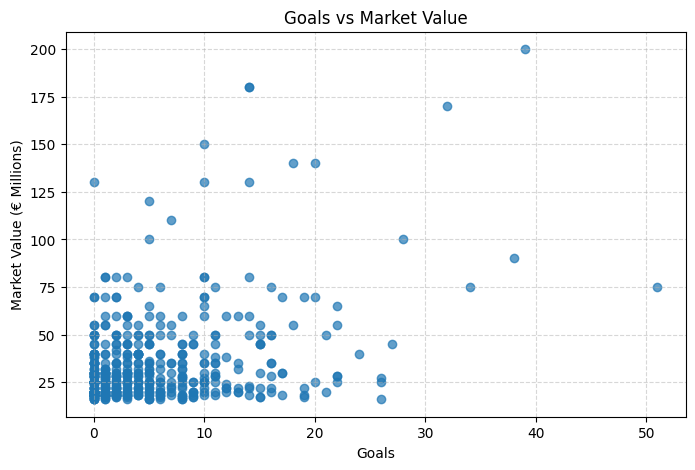

In [4]:
# Check the distribution of market values
print(df["Market Value"].describe())

# Visualizing the relationship between Goals and Market Value
plt.figure(figsize=(8, 5))
plt.scatter(df["Goals"], df["Market Value"], alpha=0.7)
plt.xlabel("Goals")
plt.ylabel("Market Value (€ Millions)")
plt.title("Goals vs Market Value")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Correlation Heatmap
We check how different features correlate with each other. This helps us see which stats (like Assists or Starts) might strongly influence price.



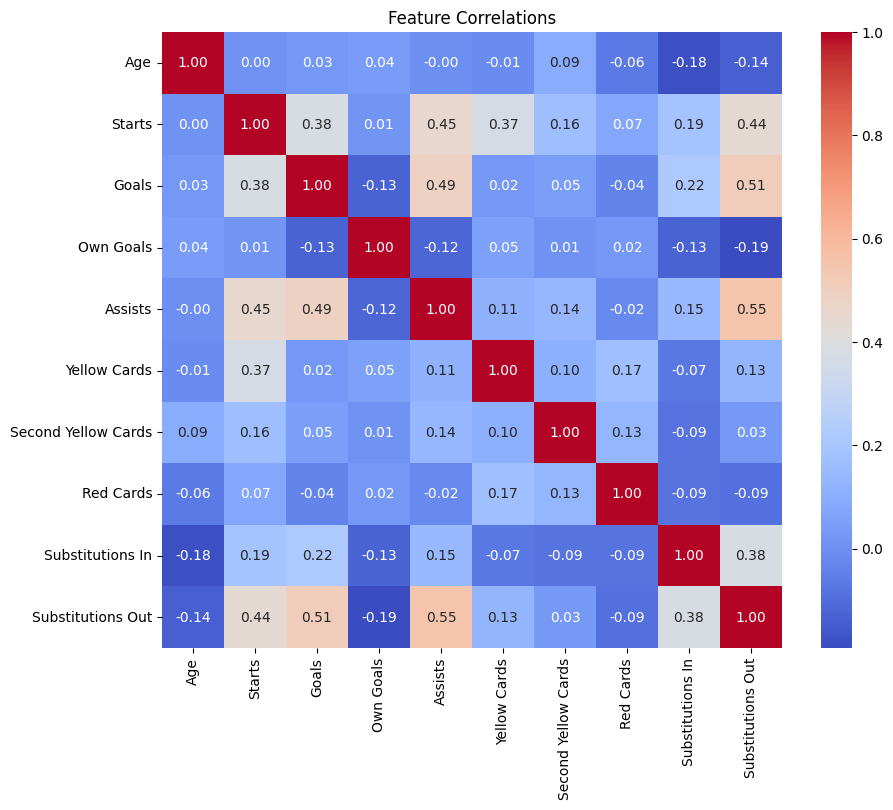

In [5]:
# Drop non-numerical columns for correlation analysis
X_eda = df.drop(["Name", "Nationality", "Club", "Market Value"], axis=1)

# Generate Heatmap
correlation = X_eda.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()


## 3. Data Preparation
We separate the dataset into:
*   **X (Features):** The numerical stats (Age, Goals, etc.)
*   **y (Target):** The Market Value

Then we split the data into **Training** (80%) and **Testing** (20%) sets.



In [6]:
# Define Target and Features
y = df["Market Value"]
X = df.drop(["Name", "Nationality", "Club", "Market Value"], axis=1)

# Split the data
X_train, X_test, y_train, y_test = sk.train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (400, 10)
Testing Data Shape: (100, 10)


## 4. Model Training
We use a **Random Forest Regressor**. This model is chosen because it handles non-linear relationships well (e.g., the relationship between Age and Value isn't a straight line) and is robust against overfitting on small datasets.



In [7]:
# Initialize the model
regr_model = RandomForestRegressor(random_state=42)

print("Training the model...")
regr_model.fit(X_train, y_train)
print("Training Complete.")


Training the model...
Training Complete.


## 5. Model Evaluation
We test the model on the unseen 'X_test' data.

**Metrics:**
*   **MAE (Mean Absolute Error):** How many millions we are off by on average.
*   **R² Score:** How much of the variance in price is explained by our stats.



In [8]:
# Make predictions
y_pred = regr_model.predict(X_test)

# Calculate Error
mae = mean_absolute_error(y_test, y_pred)
r2_score = regr_model.score(X_test, y_test)

print(f"Mean Absolute Error: €{mae:.2f}m")
print(f"Model R² Score: {r2_score:.3f}")


Mean Absolute Error: €15.77m
Model R² Score: 0.361


### Actual vs Predicted Plot
Ideally, all points should fall on the diagonal line.



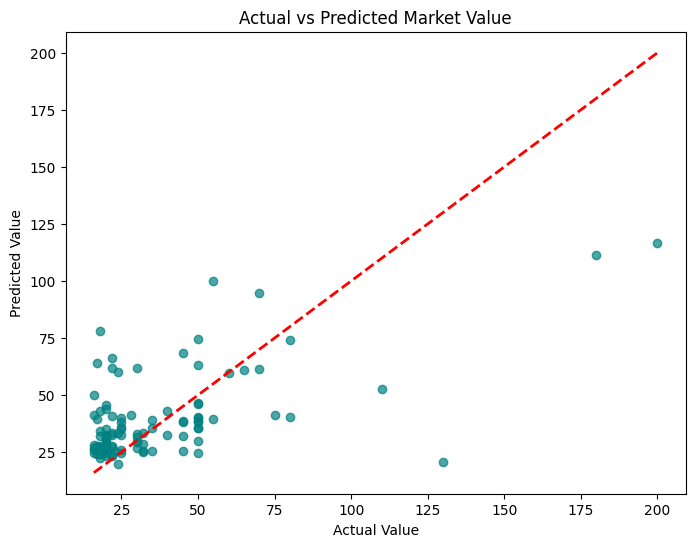

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Market Value")
plt.show()


## 6. Error Analysis & Interpretability
### Top Failures
We examine the players where the model made the biggest mistakes.
*   **Observation:** The model tends to undervalue defensive midfielders (like Rodri) because they don't have high 'Goal' stats, despite being valuable.



In [10]:
# Create a results table
results = df.loc[y_test.index].copy()
results["Predicted Value"] = y_pred
results["Error"] = abs(results["Market Value"] - results["Predicted Value"])

# Show the top 10 biggest errors
print(results[["Name", "Market Value", "Predicted Value", "Error"]]
    .sort_values(by="Error", ascending=False)
    .head(10))


                   Name  Market Value  Predicted Value   Error
9                 Rodri         130.0            20.76  109.24
0        Erling Haaland         200.0           116.60   83.40
2       Jude Bellingham         180.0           111.59   68.41
440     Christos Tzolis          18.0            78.14   60.14
11          Declan Rice         110.0            52.51   57.49
483     Tim Kleindienst          17.0            64.15   47.15
63      Bruno Fernandes          55.0            99.81   44.81
324        Oscar Gloukh          22.0            66.15   44.15
356       Romelu Lukaku          22.0            61.95   39.95
18   Dominik Szoboszlai          80.0            40.54   39.46


### Feature Importance
Which stats did the model rely on the most?



In [11]:
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": regr_model.feature_importances_}
).sort_values("importance", ascending=False)

print(feature_importance)


               feature  importance
4              Assists    0.247657
2                Goals    0.225014
1               Starts    0.146825
0                  Age    0.106069
9    Substitutions Out    0.098077
8     Substitutions In    0.094600
5         Yellow Cards    0.067787
7            Red Cards    0.005852
3            Own Goals    0.004456
6  Second Yellow Cards    0.003663
